In [65]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings 
import scipy

warnings.filterwarnings("ignore")

In [66]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Load the tweet data
tweet_data = pd.read_csv('stock_tweets.csv')
tweet_data = pd.DataFrame(tweet_data)
#Load the Training Data
print(" Dataset:")
print("=============\n")
tweet_data

 Dataset:



,Date,Tweet,Ticker,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [67]:
import yfinance as yf
import pandas as pd

# Define stock tickers from dataset
tickers = [
    "TSLA", "TSM", "AAPL", "PG", "AMZN", "MSFT", "NIO", "META", "AMD", "NFLX",
    "GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM", "XPEV", "ENPH",
    "ZS", "VZ", "BX", "NOC", "F"
]

# Define date range
start_date = "2021-09-01"
end_date = "2022-09-30"

# Create empty list to store data
all_stock_data = []

# Loop through tickers and fetch data
for ticker in tickers:
    try:
        print(f"Fetching data for {ticker}...")
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)

        # Fetch additional info
        info = stock.info

        # Ensure Date column is included
        hist.reset_index(inplace=True)

        # Add extra stock information
        hist["Ticker"] = ticker
        hist["Market Cap"] = info.get("marketCap", "N/A")
        hist["P/E Ratio"] = info.get("trailingPE", "N/A")
        hist["Dividend Yield"] = info.get("dividendYield", "N/A")
        hist["EPS"] = info.get("trailingEps", "N/A")

        # Store in list
        all_stock_data.append(hist)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Combine all data
if all_stock_data:
    stock_data = pd.concat(all_stock_data, ignore_index=True)

    # Save to CSV
    stock_data.to_csv("optimized_stock_data.csv", index=False)
    print("✅ Stock data successfully saved to optimized_stock_data.csv")
else:
    print("⚠️ No stock data was retrieved.")


Fetching data for TSLA...
Fetching data for TSM...
Fetching data for AAPL...
Fetching data for PG...
Fetching data for AMZN...
Fetching data for MSFT...
Fetching data for NIO...
Fetching data for META...
Fetching data for AMD...
Fetching data for NFLX...
Fetching data for GOOG...
Fetching data for PYPL...
Fetching data for DIS...
Fetching data for BA...
Fetching data for COST...
Fetching data for INTC...
Fetching data for KO...
Fetching data for CRM...
Fetching data for XPEV...
Fetching data for ENPH...
Fetching data for ZS...
Fetching data for VZ...
Fetching data for BX...
Fetching data for NOC...
Fetching data for F...
✅ Stock data successfully saved to optimized_stock_data.csv


In [68]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Market Cap,P/E Ratio,Dividend Yield,EPS
0,2021-09-01 00:00:00-04:00,244.693329,247.330002,243.756668,244.696671,39612900,0.0,0.0,TSLA,1138422841344,174.34975,N/A,2.03
1,2021-09-02 00:00:00-04:00,244.833328,246.990005,243.513336,244.130005,38331900,0.0,0.0,TSLA,1138422841344,174.34975,N/A,2.03
2,2021-09-03 00:00:00-04:00,244.083328,244.666672,241.399994,244.523331,45738300,0.0,0.0,TSLA,1138422841344,174.34975,N/A,2.03
3,2021-09-07 00:00:00-04:00,246.666672,253.399994,246.419998,250.973328,60119400,0.0,0.0,TSLA,1138422841344,174.34975,N/A,2.03
4,2021-09-08 00:00:00-04:00,253.860001,254.816666,246.923340,251.289993,56379000,0.0,0.0,TSLA,1138422841344,174.34975,N/A,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,2022-09-23 00:00:00-04:00,10.320596,10.412669,10.002524,10.303856,104043700,0.0,0.0,F,36840267776,6.366438,7.91,1.46
6796,2022-09-26 00:00:00-04:00,10.220153,10.362448,9.985785,10.036006,89300400,0.0,0.0,F,36840267776,6.366438,7.91,1.46
6797,2022-09-27 00:00:00-04:00,10.220154,10.228525,9.759787,9.969045,87044400,0.0,0.0,F,36840267776,6.366438,7.91,1.46
6798,2022-09-28 00:00:00-04:00,9.969045,10.245265,9.843490,10.195044,72701600,0.0,0.0,F,36840267776,6.366438,7.91,1.46


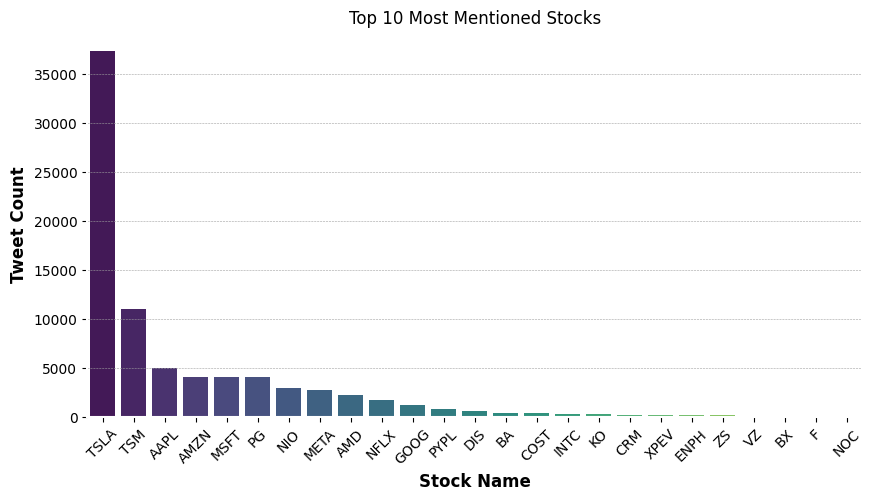

In [69]:
import matplotlib.pyplot as plt
# Convert Date column to datetime format
tweet_data["Date"] = pd.to_datetime(tweet_data["Date"], errors="coerce")

# Top 10 most mentioned stocks
top_stocks = tweet_data["Ticker"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_stocks.index, y=top_stocks.values, palette="viridis")
plt.xlabel("Stock Name")
plt.ylabel("Tweet Count")
plt.title("Top 10 Most Mentioned Stocks")
plt.xticks(rotation=45)
plt.show()

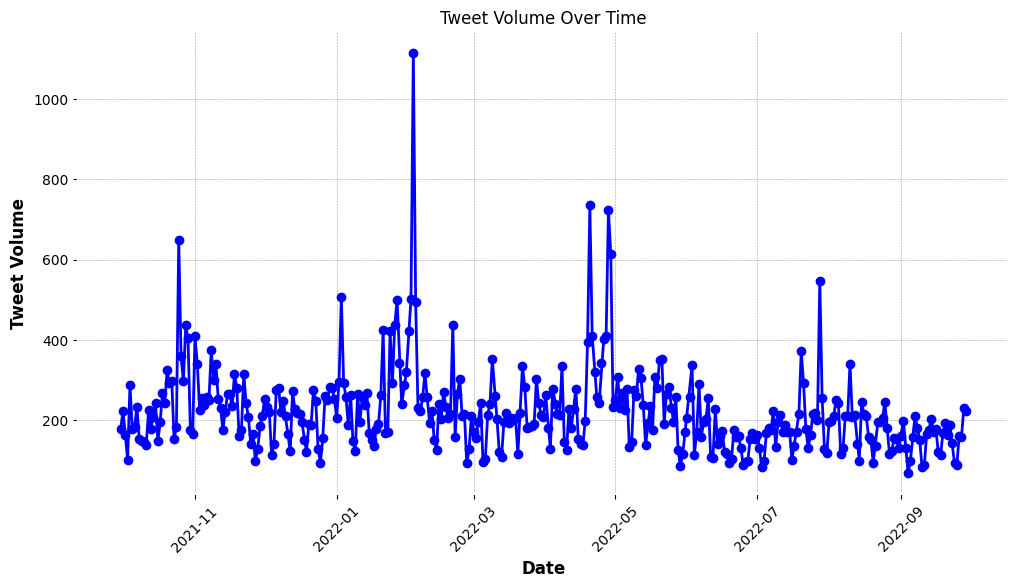

In [70]:
# Resample tweets by day to analyze volume over time
tweet_volume = tweet_data.resample("D", on="Date").size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(tweet_volume.index, tweet_volume.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Tweet Volume Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

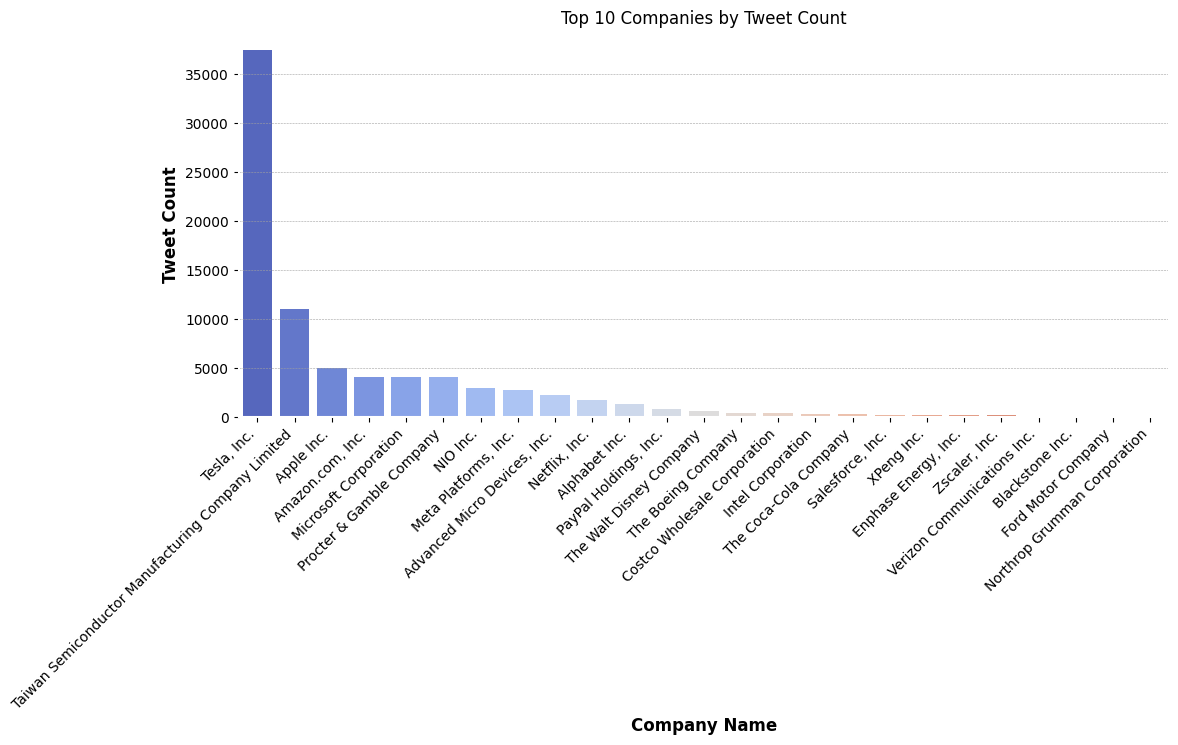

In [71]:
# Top 10 companies by tweet count
top_companies = tweet_data["Company Name"].value_counts()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_companies.index, y=top_companies.values, palette="coolwarm")
plt.xlabel("Company Name")
plt.ylabel("Tweet Count")
plt.title("Top 10 Companies by Tweet Count")
plt.xticks(rotation=45, ha="right")
plt.show()

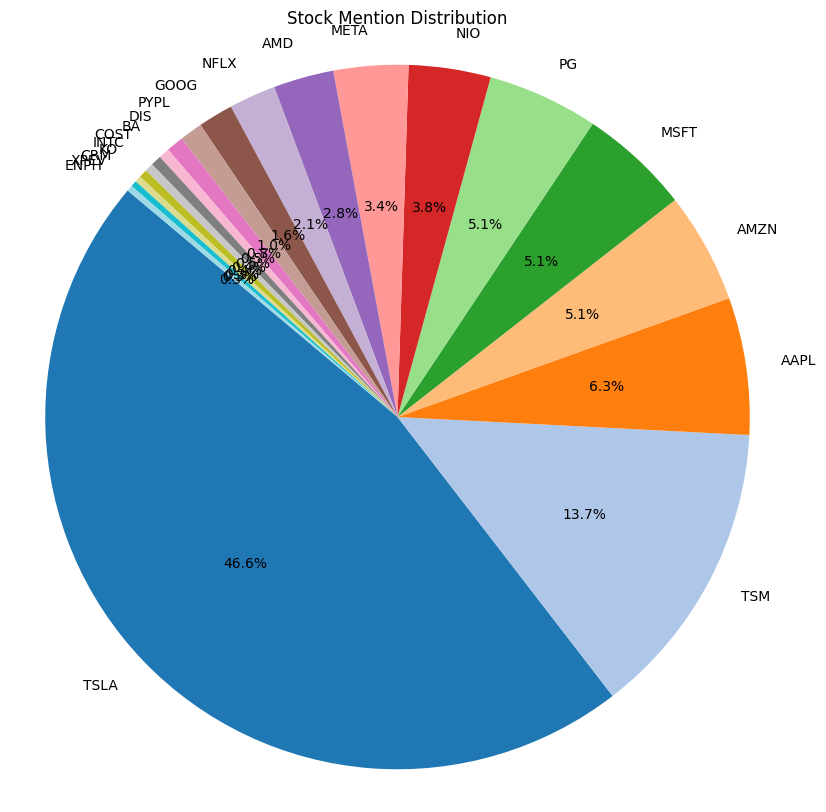

In [72]:
# Aggregating stock mentions (taking only the top 20 for better visibility)
stock_counts = tweet_data["Ticker"].value_counts().nlargest(20)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(stock_counts, labels=stock_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=plt.cm.tab20.colors)  # Use colormap colors manually
plt.title("Stock Mention Distribution")
plt.axis("equal")  # Ensures pie chart is a circle
plt.show()

In [73]:
# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
tweet_data['Date'] = pd.to_datetime(tweet_data['Date']).dt.date

# Confirm the conversion
print(stock_data['Date'].head())
print(tweet_data['Date'].head())


0    2021-09-01
1    2021-09-02
2    2021-09-03
3    2021-09-07
4    2021-09-08
Name: Date, dtype: object
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


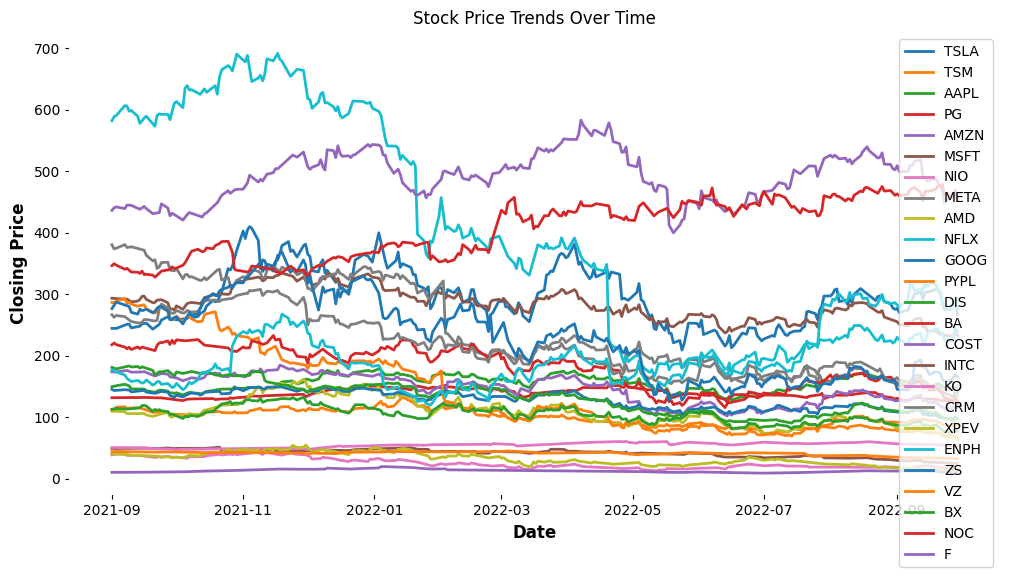

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
stock_data = pd.read_csv("detailed_stock_data.csv", parse_dates=["Date"])

# Plot the stock closing prices over time
plt.figure(figsize=(12, 6))
for ticker in stock_data["Ticker"].unique():
    subset = stock_data[stock_data["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.grid()
plt.show()


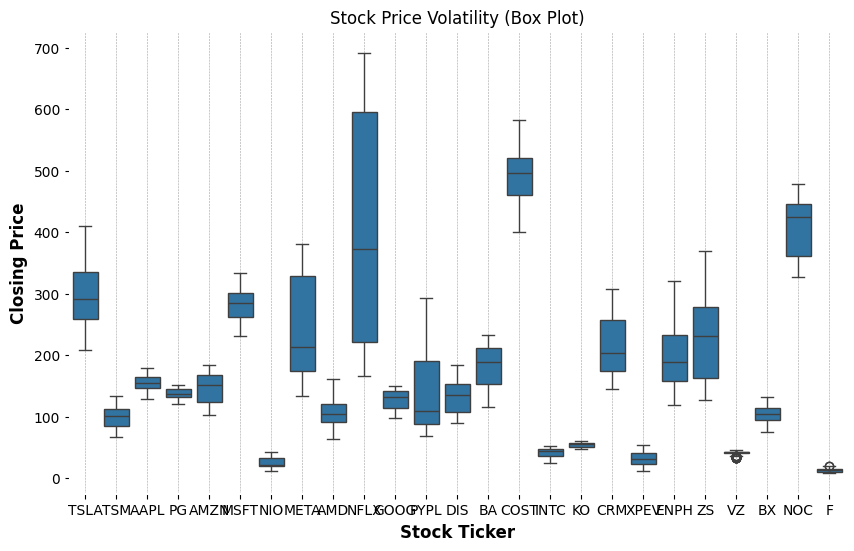

In [75]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Ticker", y="Close", data=stock_data)
plt.title("Stock Price Volatility (Box Plot)")
plt.xlabel("Stock Ticker")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


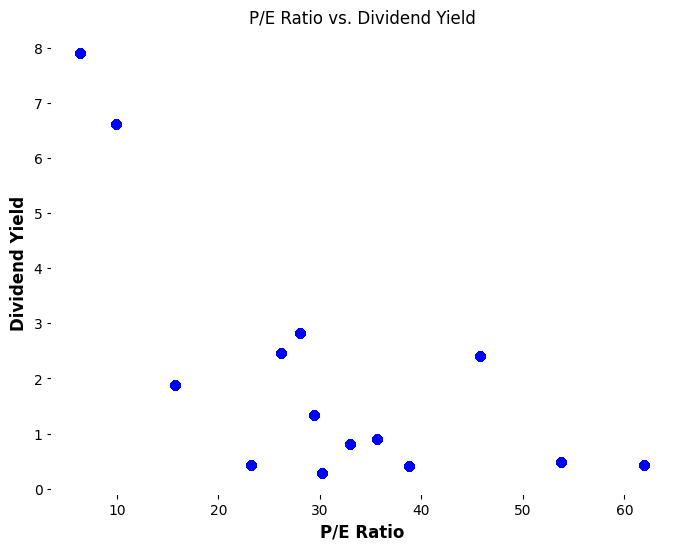

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(stock_data["P/E Ratio"], stock_data["Dividend Yield"], alpha=0.7, c="blue")

plt.xlabel("P/E Ratio")
plt.ylabel("Dividend Yield")
plt.title("P/E Ratio vs. Dividend Yield")
plt.grid()
plt.show()


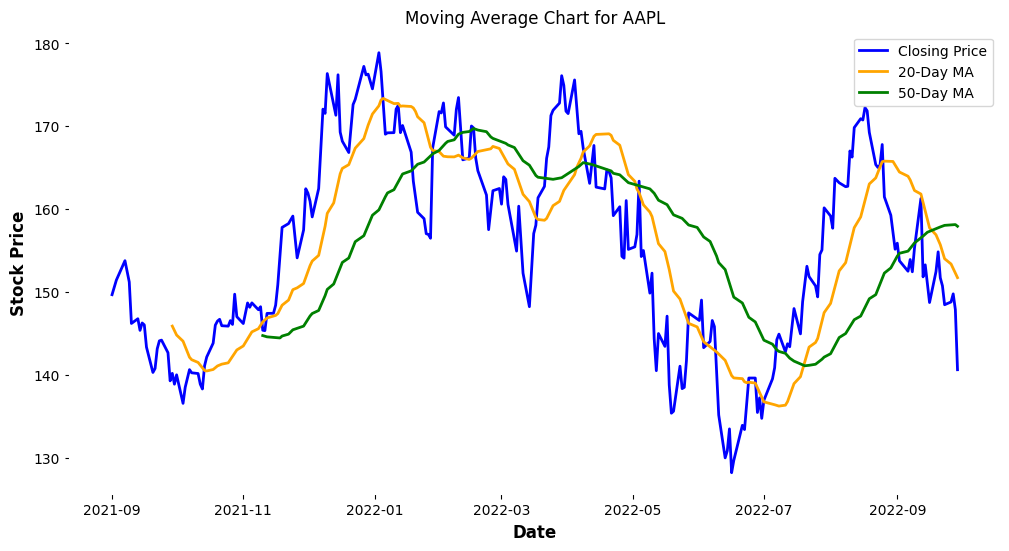

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
stock_data = pd.read_csv("detailed_stock_data.csv", parse_dates=["Date"])

# Function to plot Moving Averages
def plot_moving_average(ticker, short_window=20, long_window=50):
    subset = stock_data[stock_data["Ticker"] == ticker]
    
    # Calculate Moving Averages
    subset["Short MA"] = subset["Close"].rolling(window=short_window).mean()
    subset["Long MA"] = subset["Close"].rolling(window=long_window).mean()

    # Plot Closing Prices and Moving Averages
    plt.figure(figsize=(12, 6))
    plt.plot(subset["Date"], subset["Close"], label="Closing Price", color="blue")
    plt.plot(subset["Date"], subset["Short MA"], label=f"{short_window}-Day MA", color="orange")
    plt.plot(subset["Date"], subset["Long MA"], label=f"{long_window}-Day MA", color="green")

    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"Moving Average Chart for {ticker}")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage for Apple (AAPL)
plot_moving_average("AAPL", short_window=20, long_window=50)


In [78]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker', 'Market Cap', 'P/E Ratio', 'Dividend Yield',
       'EPS'],
      dtype='object')

In [84]:


# Define visualization functions
def plot_stock_trends(df, ticker):
    """Plot line chart for stock prices"""
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["High"], marker="o", linestyle="-", label=f"{ticker} High Price")
    plt.title(f"{ticker} Stock Price Trend")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

def plot_stock_open(df, ticker):
    """Plot line chart for stock prices"""
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Low"], marker="o", linestyle="-", label=f"{ticker} Low Price")
    plt.title(f"{ticker} Stock Price Trend")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

def plot_candlestick_chart(df, ticker):
    """Plot candlestick chart for stock prices"""
    df.set_index("Date", inplace=True)
    mpf.plot(df, type="candle", style="charles", volume=True, title=f"{ticker} Candlestick Chart")

def plot_bollinger_bands(df, ticker):
    """Plot Bollinger Bands"""
    df["SMA20"] = df["Close"].rolling(window=20).mean()
    df["Upper Band"] = df["SMA20"] + (df["Close"].rolling(window=20).std() * 2)
    df["Lower Band"] = df["SMA20"] - (df["Close"].rolling(window=20).std() * 2)

    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
    plt.plot(df["Date"], df["SMA20"], label="20-day SMA", color="green")
    plt.fill_between(df["Date"], df["Upper Band"], df["Lower Band"], color="gray", alpha=0.2, label="Bollinger Bands")
    plt.title(f"{ticker} Bollinger Bands")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

def plot_stock_volatility(df):
    """Plot boxplot to compare volatility across stocks"""
    plt.figure(figsize=(12, 5))
    sns.boxplot(x="Ticker", y="Close", data=df)
    plt.title("Stock Volatility Comparison")
    plt.xlabel("Stock Ticker")
    plt.ylabel("Stock Price (USD)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

def plot_pe_vs_dividend(df):
    """Scatter plot of P/E Ratio vs. Dividend Yield"""
    df = df.dropna(subset=["P/E Ratio", "Dividend Yield"])

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x="P/E Ratio", y="Dividend Yield", hue="Ticker", size="Market Cap", data=df, alpha=0.7)
    plt.title("P/E Ratio vs. Dividend Yield")
    plt.xlabel("P/E Ratio")
    plt.ylabel("Dividend Yield")
    plt.legend()
    plt.grid()
    plt.show()



In [85]:
# Create interactive widgets
ticker_dropdown = widgets.Dropdown(options=tickers, description="Stock:")
visualization_options = widgets.RadioButtons(
    options=[
        "Stock Trends (Close)",
        "Stock Trends (Open)",
        "Candlestick Chart",
        "Bollinger Bands",
        "Stock Volatility (Boxplot)",
        "P/E vs. Dividend Yield (Scatter Plot)"
        
    ],
    description="Visualization:"
)

In [86]:
# Update function
def update_plot(ticker, visualization):
    df = fetch_stock_data(ticker)

    if visualization == "Stock Trends (Close)":
        plot_stock_trends(df, ticker)
    elif visualization == "Stock Trends (Open)":
        plot_stock_open(df, ticker)
    elif visualization == "Candlestick Chart":
        plot_candlestick_chart(df, ticker)
    elif visualization == "Bollinger Bands":
        plot_bollinger_bands(df, ticker)
    elif visualization == "Stock Volatility (Boxplot)":
        plot_stock_volatility(df)
    elif visualization == "P/E vs. Dividend Yield (Scatter Plot)":
        plot_pe_vs_dividend(df)
   

# Link widgets to function
widgets.interactive(update_plot, ticker=ticker_dropdown, visualization=visualization_options)


interactive(children=(Dropdown(description='Stock:', options=('TSLA', 'TSM', 'AAPL', 'PG', 'AMZN', 'MSFT', 'NI…